In [1]:
from scipy import optimize
import cvxopt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()

In [3]:
r, h = sympy.symbols('r, h')

In [4]:
Area = 2*sympy.pi*r**2+2*sympy.pi*r*h

In [5]:
Volume = sympy.pi*r**2*h

In [6]:
h_r = sympy.solve(Volume-1)[0]

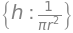

In [7]:
h_r

In [8]:
Area_r = Area.subs(h_r)

In [9]:
Area_r

In [10]:
rsol = sympy.solve(Area_r.diff(r))[0]

In [11]:
rsol

In [12]:
_.evalf()

In [13]:
Area_r.diff(r, 2).subs(r, rsol)

In [14]:
Area_r.subs(r, rsol)

In [15]:
_.evalf()

In [16]:
def f(r):
    return 2*np.pi*r**2+2/r

In [17]:
r_min = optimize.brent(f, brack=(0.1, 4))

In [18]:
r_min

In [19]:
f(r_min)

In [20]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

In [21]:
x1, x2 = sympy.symbols('x_1, x_2')
f_sym = (x1-1)**4+5*(x2-1)**2-2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

In [22]:
sympy.Matrix(fprime_sym)

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [23]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [24]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [25]:
def func_XY_to_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

In [26]:
f = func_XY_to_X_Y(f_lmbda)
f_prime = func_XY_to_X_Y(fprime_lmbda)
f_hess = func_XY_to_X_Y(fhess_lmbda)

In [28]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=f_prime, fhess=f_hess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


In [29]:
x_opt

array([1.88292613, 1.37658523])

In [30]:
f(x_opt)

array(-3.86722289)

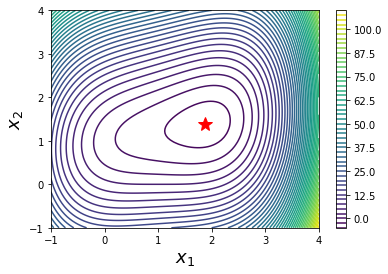

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
plt.colorbar(c, ax=ax)

In [34]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=f_prime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [35]:
x_opt

array([1.88292645, 1.37658596])

In [36]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=f_prime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [37]:
x_opt

array([1.88292612, 1.37658523])

In [38]:
x_opt = optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


In [39]:
x_opt

array([1.88292644, 1.37658595])

In [40]:
def f(X):
    x, y = X
    return (4*np.sin(np.pi*x))+(6*np.sin(np.pi*y))+(x-1)**2+(y-1)**2

In [41]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)

In [42]:
x_start

array([1.5, 1.5])

In [43]:
f(x_start)

In [44]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


In [45]:
x_opt

array([1.47586906, 1.48365787])

In [46]:
f(x_opt)

In [47]:
result = optimize.minimize(f, x_start, method='BFGS')

In [48]:
result

      fun: -9.520229273055016
 hess_inv: array([[2.41596001e-02, 4.61008275e-06],
       [4.61008275e-06, 1.63490348e-02]])
      jac: array([-7.15255737e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([1.47586906, 1.48365787])

In [49]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0+b1*np.exp(-b2*x**2)

In [50]:
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y+0.05*np.random.randn(len(xdata))

In [51]:
def g(beta):
    return ydata-f(xdata, *beta)

In [52]:
beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([0.25854256, 0.759799  , 0.50561311])

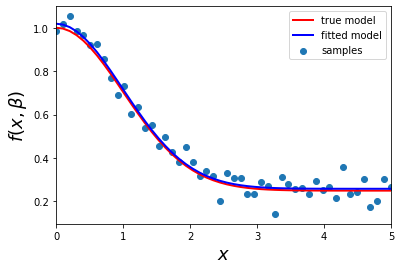

In [53]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
ax.legend()

In [54]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)

In [55]:
beta_opt

array([0.25854256, 0.759799  , 0.50561311])

In [56]:
def f(X):
    x, y = X
    return (x-1)**2+(y-1)**2

In [57]:
x_opt = optimize.minimize(f, [1, 1], method='BFGS').x

In [58]:
bnd_x1, bnd_x2 = (2, 3), (0, 2)

In [59]:
x_cons_opt = optimize.minimize(f, [1, 1], method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x

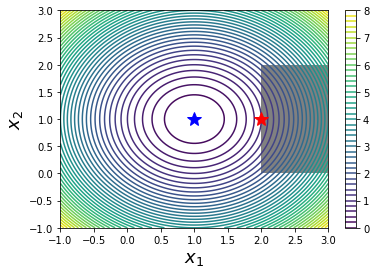

In [64]:
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
                           (bnd_x1[1] - bnd_x1[0]),
                           (bnd_x2[1] - bnd_x2[0]),
                           facecolor='grey')
ax.add_patch(bound_rect)
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
plt.colorbar(c, ax=ax)

In [65]:
x = x0, x1, x2, l = sympy.symbols('x_0, x_1, x_2, lambda')
f = x0*x1*x2
g = 2*(x0*x1+x1*x2+x2*x0)-1
L = f+l*g

In [66]:
grad_L = [sympy.diff(L, x_) for x_ in x]

In [67]:
sols = sympy.solve(grad_L)

In [68]:
sols

In [69]:
g.subs(sols[0])

In [70]:
f.subs(sols[0])

In [71]:
def f(X):
    return -X[0]*X[1]*X[2]

In [72]:
def g(X):
    return 2*(X[0]*X[1]+X[1]*X[2]+X[0]*X[2])

In [73]:
constraint = dict(type='eq', fun=g)

In [74]:
result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP', constraints=[constraint])

In [75]:
result

     fun: 4.0161864837891736e-14
     jac: array([ 7.72755713e-05,  2.80434677e-05, -4.93894020e-09])
 message: 'Optimization terminated successfully'
    nfev: 33
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 2.59633148e-07, -2.33497756e-07,  6.62477330e-01])

In [76]:
def f(X):
    return (X[0]-1)**2+(X[1]-1)**2

In [77]:
def g(X):
    return X[1]-1.75-(X[0]-0.75)**4

In [78]:
constraints = [dict(type='eq', fun=g)]

In [79]:
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x

In [80]:
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP', constraints=constraints).x

In [81]:
x_opt, x_cons_opt

(array([0.99999999, 0.99999999]), array([0.96857659, 1.75228252]))

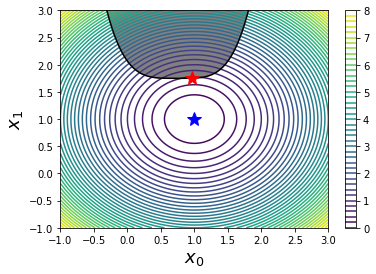

In [82]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75+(x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75+(x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
ax.set_xlabel(r'$x_0$', fontsize=18)
ax.set_ylabel(r'$x_1$', fontsize=18)
plt.colorbar(c, ax=ax)

In [84]:
c = np.array([-1.0, 2.0, -3.0])

In [85]:
A = np.array([[1.0, 1.0, 0.0],
              [-1.0, 3.0, 0.0],
              [0.0, -1.0, 1.0]])

In [86]:
b = np.array([1.0, 2.0, 3.0])

In [87]:
A_ = cvxopt.matrix(A)

In [88]:
c_ = cvxopt.matrix(c)

In [89]:
b_ = cvxopt.matrix(b)

In [90]:
sol = cvxopt.solvers.lp(c_, A_, b_)

Optimal solution found.


In [91]:
sol

{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.0,
 'relative gap': 0.0,
 'primal objective': -10.0,
 'dual objective': -10.0,
 'primal infeasibility': 0.0,
 'primal slack': -0.0,
 'dual slack': 0.0,
 'dual infeasibility': 1.4835979218054372e-16,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [92]:
x = np.array(sol['x'])

In [93]:
x

array([[0.25],
       [0.75],
       [3.75]])

In [94]:
sol['primal objective']